In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [5]:
df=pd.read_csv(r'C:\Users\user\Documents\iris.csv')

In [6]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

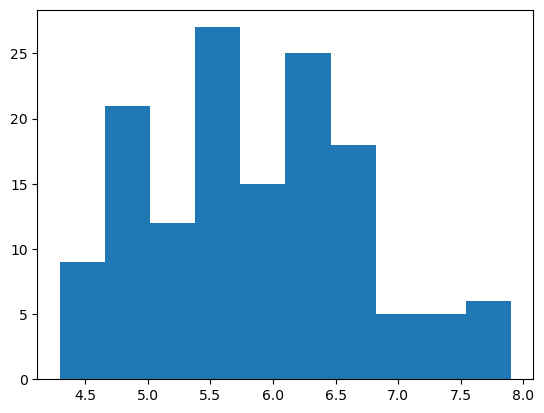

In [11]:
plt.hist(df['SL'])
plt.show()

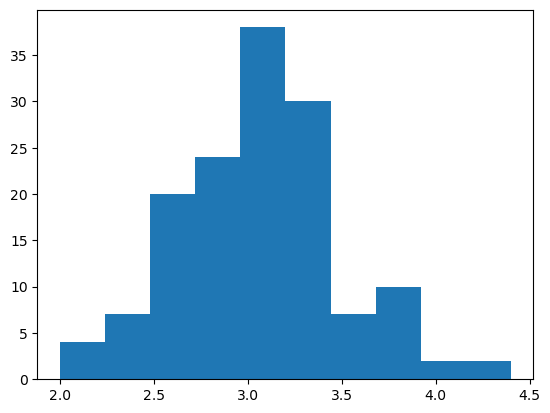

In [32]:
plt.hist(df['SW'])
plt.show()

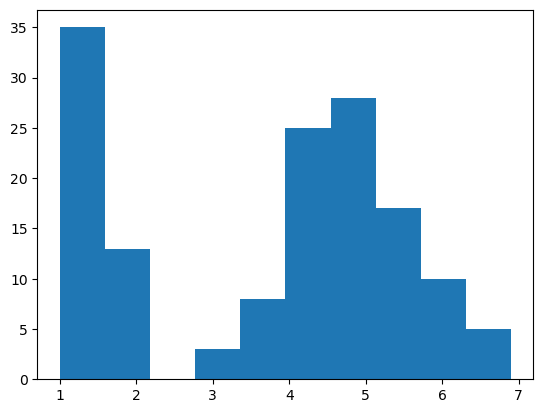

In [12]:
plt.hist(df['PL'])
plt.show()

# 2. Do the necessary pre-processing steps

In [14]:
###filling missing values

In [15]:
df.SL.fillna(df.SL.median(),inplace=True)

In [16]:
df.SW.fillna(df.SW.median(),inplace=True)

In [17]:
df.PL.fillna(df.PL.median(),inplace=True)

In [18]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [39]:
###Outliers

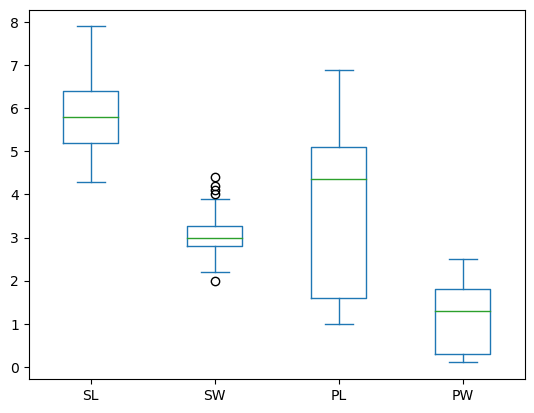

In [19]:
df.plot(kind="box")
plt.show()

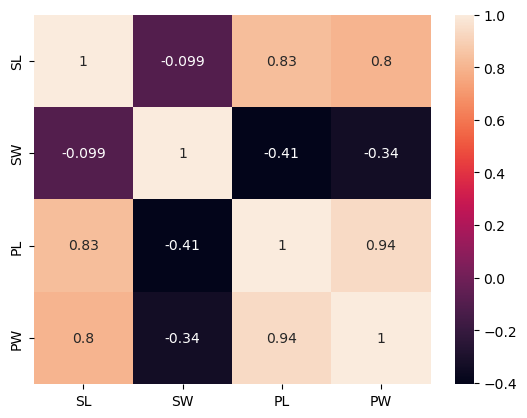

In [20]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)


In [64]:
x=df.drop(['Classification'],axis=1)

In [65]:
y=df['Classification']

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [69]:
confusion_matrix(y_test,y_pred_log)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [97]:
Log_reg_acc=accuracy_score(y_test,y_pred_log)
Log_reg_acc

0.9736842105263158

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
metric_k=[]
neighbors=np.arange(3,15)

In [85]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

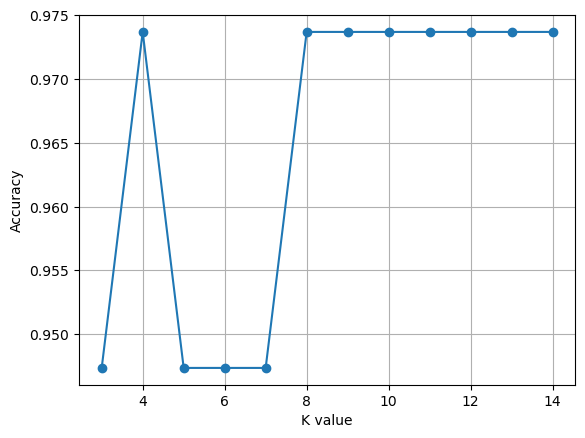

In [86]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [87]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='euclidean')
classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [96]:
KNN_acc=accuracy_score(y_test,y_prediction)
KNN_acc

0.9736842105263158

In [89]:
confusion_matrix(y_test,y_prediction)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [90]:
print(classification_report(y_test,y_prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# SVM

# SVM Linear Kernal

In [39]:
from sklearn.svm import SVC

In [41]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [95]:
svm_lin_acc=accuracy_score(y_test,y_pred_svm)
svm_lin_acc

1.0

# SVM rbf Kernal

In [44]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred_svm1)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [94]:
svm_rbf_acc=accuracy_score(y_test,y_pred_svm1)
svm_rbf_acc

0.9736842105263158

# DECISION TREE MODEL

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)

In [48]:
y_pred_dt=dt_cls.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [93]:
Dec_tre_acc=accuracy_score(y_test,y_pred_dt)
Dec_tre_acc

1.0

# RANDOM FOREST MODEL

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)

In [52]:
y_pred_rf=rf_cls.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [91]:
R_frst_acc=accuracy_score(y_test,y_pred_rf)

In [92]:
R_frst_acc

1.0

# which model gives the best result in your file and justify your answer

here SVM linear kernal,Decision tree,Random forest gives the accuracy of 1.0(100%)
[R_frst_acc,Dec_tre_acc,svm_lin_acc=1.0]
remainig only giving 0.973(97%)[KNN_acc,Log_reg_acc,svm_rbf_acc=0.9736842105263158]

# so the best models are SVM Linear Kernal,Decision Tree,Random Forest 